[latex_cheat_sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf)  
[latex_cheat_sheet_2](https://wch.github.io/latexsheet/)

References:
- [wave fundamentals](https://www.acs.psu.edu/drussell/demos.html)

<center style='font-size:220%'>Strings and Frets Modeling

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import notebook_helpers as nh

import pandas as pd # delete later

In [1]:
import noodler

Notes:  
 - All formulae should be in metric 
 - Avoid prefixes
   - exception for kilograms for now
 - Music is about opinions and this notebook is full of mine, be your own judge on your path

<center><h1>Coordinate System

For the purpose of this notebook and associated library,  
We are going to define the coordinate system of the guitar as:

|   Axis	|   Direction	|   Origin (0 index)	|   	
|---	|---	|---	|
|   X	|   from bridge to nut	|   Bridge	|   	
|   Y	|   from thinnest string to thickest string	|   Thinnest string	|   	
|   Z	|   from pickups looking towards strings above	|   Invisible line where action is 0	|   	

This keeps things right handed  
Following some intuition (plucking/strumming down is negative)  
Puts 0,0,0 at an ideal spot to calculate from

<center><h1>Rationalizing Guitar Dimensions

<center><h2>Fret Distance

reference: [STEM Guitar, Fret Module](https://drive.google.com/drive/folders/1MBi5mdN6x-j77abd2uoLcDZvzv2F-FCK)

`scale_length` is distance between the nut and bridge

In [3]:
noodler.scale_length # in m based off typical Fender length of 25.5"

{'stratocaster': 0.6477}

In [4]:
noodler.get_fret_distance(4, noodler.scale_length['stratocaster'])

-0.5140798306799014

In [5]:
noodler.get_fret_distances(21, noodler.scale_length['stratocaster'])

array([-0.6477    , -0.61134739, -0.5770351 , -0.54464861, -0.51407983,
       -0.48522675, -0.45799306, -0.43228789, -0.40802543, -0.38512472,
       -0.36350933, -0.34310712, -0.32385   , -0.3056737 , -0.28851755,
       -0.2723243 , -0.25703992, -0.24261337, -0.22899653, -0.21614394,
       -0.20401272, -0.19256236])

<center><h1>Strings

<center><h2>Action

Action is the distance between string and pickup/fretboard. 

This changes from high to low strings to offset thicker strings creating larger output signals


References:
 - [Fralin _notes on topic](https://www.fralinpickups.com/2019/02/17/how-to-properly-set-pickup-height/)

In [6]:
noodler.action

{'fralin': {'thickest_string_action': 0.0031750063500127004,
  'thinnest_string_action': 0.0015875031750063502}}

In [7]:
noodler.get_action_per_string('fralin',6)

array([0.00317501, 0.00285751, 0.00254001, 0.0022225 , 0.001905  ,
       0.0015875 ])

<center><h2>String Tension

References:  
 - [physics of sound synth](http://home.mit.bme.hu/~bank/phd/tbooklet.pdf)
 - [fletcher says](https://kupdf.net/download/fletcher_59aa86c8dc0d60477f568edd_pdf)
 - [Physics of instruments or some shit](http://kellerphysics.com/acoustics/Lapp.pdf)
 - [Notes on solving for tension of guitar string from wave equation](https://courses.physics.illinois.edu/phys406/sp2017/Student_Projects/Fall00/DAchilles/Guitar_String_Tension_Experiment.pdf)  
 - [Dumbed down method](https://www.dirkbertels.net/music/tension.php)  
 - [Sample Unit Weights for strings](https://www.daddario.com/globalassets/pdfs/accessories/tension_chart_13934.pdf)

Dig way back in your brain and remember:  
> ${\lambda}= \frac{v}{f}$  [1]   
>> ${\lambda}$: wavelength  
${v}$: velocity  
${f}$: frequency  

First mode of a string is $\frac{\lambda}{2}$

Length of the string is `scale_length` or ${L}$  

so 
> ${L} = \frac{\lambda}{2}$  

or 
> ${\lambda} = {2}{L}$ [2]

Solving for f in [1] and substituting ${\lambda}$ for ${2}{L}$, gives:

> ${f} = \frac{v}{{2}{L}}$ [3]


String wave velocity is defined as:  

> ${v}=\sqrt{\frac{T}{\mu}}$  [4]  
>>${v}$: velocity of string   
${T}$: tension of string (N)  
${\mu}$: linear mass density (kg/m)  

so:
> ${f}= \frac{1}{{2}{L}} \sqrt{\frac{T}{\mu}}$ [5]   
>>${f}$: frequency (Hz)  
${L}$: `scale_length` (cm)  
${T}$: tension (newtons)  
${\mu}$: linear mass density (kg/m) *called unit weight sometimes

Solving for tension gives:  
> ${T} = (({f}{2}{L})^{2}){\mu}$  

or simply:  
> ${T} = {v}^{2}{\mu}$ [6]

So by increasing the length of the neck of a guitar,  
the amount of tension needed to maintain a note/frequency  
is lowered pretty quickly

<center><h2>String Linear Mass Density, $\mu$

Don't overthink this value.  

Looking at the units (kg/m), gives the answer:

>$\mu = \frac {m}{L}$
>>$m$ -- mass of string where we are interested (between nut and bridge, not entire string)  
>>$L$ -- length of string where we are interested (aka `scale_length`)

Since this is a linear relationship, scaling based of ratios is easy peasy

Could write tension in this form, but not sure it's useful yet:
> ${T} = \frac {{m}{v^2}}{L}$

Could write tension in this form, but not sure it's useful yet:
> ${T} = 4f^2Lm$

reference [ddario strings](https://www.daddario.com/globalassets/pdfs/accessories/tension_chart_13934.pdf)

they were given in lb/in. So I multiplied by  0.0115212 to get to kg/m

In [8]:
noodler.string_gauge_to_meters(noodler.gauges['heavy_bottom'])

[0.0013208,
 0.0010668000000000001,
 0.000762,
 0.00043180000000000003,
 0.0003302,
 0.000254]

In [9]:
noodler.scale_length

{'stratocaster': 0.6477}

In [10]:
noodler.string_linear_mass_density

{10: 2.5519458e-07,
 13: 4.3135372800000003e-07,
 17: 7.375872240000001e-07,
 26: 1.4598512520000002e-06,
 30: 1.985794032e-06,
 36: 2.760940368e-06,
 42: 3.718928148e-06,
 46: 4.402941792e-06,
 52: 5.542734108e-06}

<center><h2>String Magnetic Properties

References:  
 1. [Ernie Ball patent on cobalt alloy](https://patents.google.com/patent/US8222504B1/en)
 2. [Magnetic field induced on strings](https://courses.physics.illinois.edu/phys406/sp2017/Lecture_Notes/Waves/PDF_FIles/Waves_2.pdf)

Goal is to have good magnetic permeability

"alloy is easily magnetized and demagnetized and/or has a high magnetic permeability with a high magnetic saturation level. Having a high magnetic permeability and a high magnetic saturation level allows the string to be highly responsive to strong magnetic fields and to thereby have increased output and wider dynamic range when used in an instrument having a magnetic pickup."[1]

<center><h2>String Gauges

When looking at string gauges, they are given in nice integers, like 10 or 52  
This represents the diameter and can be converted to a useful metric by:  
> ${d}={0.001}\cdot {g}$  
>>${d}$: diameter of the string in inches  
${g}$: given string "gauge"  

Then to get to meters simply multiply by `0.0254` giving the final formulae of:  
> ${d}={2.54\text{e-}5}\cdot{g}$  

In [11]:
noodler.string_gauges

{'heavy_bottom': [52, 42, 30, 17, 13, 10],
 'regular_slinky': [46, 36, 26, 17, 13, 10]}

In [12]:
noodler.string_gauge_to_meters(noodler.string_gauges['heavy_bottom'])

[0.0013208,
 0.0010668000000000001,
 0.000762,
 0.00043180000000000003,
 0.0003302,
 0.000254]

<center><h2>String Movement

<center><h3>General Wave Equation

Start with the general wave equation:

> ${y(x,t)}= f_{right}(x-c\cdot t + \phi) + f_{left}(x+c\cdot t + \phi)$
>> $f_{right}$ -- function for wave travelling in right direction  
$f_{left}$ -- function for wave travelling in left direction

Assuming the wave imposed on the guitar string is a sine wave:

> ${y(x,t)}=y_{init-right}\cdot\sin(kx - {\omega}{t} + \phi) + y_{init-left}\cdot \sin(kx + {\omega}{t} + \phi)$

<center><h3>Applying Constraints

Putting the constraints the guitar puts on a string, which are:
1. at $x=0$, which is at the bridge/saddles, string motion is ideally 0, so:
>$y(0,t)=0$
2. at $x=-L$, which is at the nut/top of the guitar, string motion is again ideally 0, so:
>$y(-L,t)=0$

<center><h4>Solve for 1.

> ${y(0,t)}= f_{right}(c\cdot t - x) + f_{left}(c\cdot t + x)$ = 0

> ${y(0,t)}=y_{init-right}\cdot\sin(-{\omega}{t} + \phi) + y_{init-left}\cdot \sin({\omega}{t} + \phi) = 0$

> $y_{init-right}\cdot\sin(-{\omega}{t} + \phi) = - y_{init-left}\cdot \sin({\omega}{t} + \phi)$  
keep in mind that:  
> $sin(-{\omega}{t} + \phi) = - \sin({\omega}{t} + \phi)$  
so the only way for the equation to be true:  
> $y_{init-right} = -y_{init-left}$  
so:  
> ${y(x,t)}=y_{init}\cdot (\sin(kx-{\omega}{t} + \phi) - \sin(kx+{\omega}{t} + \phi))$

Use obscure trig identity you definitely remember off the top of your head:
> $sin(a)+sin(b)= 2sin(\frac {a+b}{2})cos(\frac {a-b}{2})$

>${y(x,t)}=2y_{init}{sin(kx)cos(wt)}$

Intuitively the initial is doubled because we are saying that at the ends, they are fixed and reflect perfectly.  
So the standing wave reflects back and doubles in size  

<center><h4>Solve for 2.

Wave number:
> $k = \frac {\omega}{v} = \frac {2\pi}{\lambda} = \frac {\pi}{L}$

> $f = \frac {{n}{v}}{2{L}}$

> ${y(-L,t)}=y_{init-right}\cdot\sin({-Lk}-{\omega}{t} + \phi) + y_{init-left}\cdot \sin({-Lk}+{\omega}{t} + \phi) = 0$ 

Knowing what we solved above, if we have no term where the now $-Lk$ is, our solution is valid, so:
> ${-L}{k}=0$  

using $k=\frac {\pi}{L}$

> $\frac {-n\pi}{L}=0$ 

>${y(-L,t)}=2y_{init}{sin(-Lk)cos(wt)}=0$  

Remember:  
>$\sin {n}{\pi}{f}{t} = 0$

> ${y(0,t)}= f(c\cdot t - x) = 0$

> ${y(0,t)}= Asin(c\cdot t) = 0$

Set constraints so that $y=0$ at $x=0$ and $x=-L$ (-L since x-axis points from nut to bridge)
so:
> $\sin( {-L}{k})=0$  

using ${k}=\frac {\pi}{L}$

> $\sin( {-n\pi})=0$ 

so:

> ${k}{L} = {n}{\pi}$

Fletcher says:

Normal Modes of String with Fixed Ends:

> $y(x,t) =(A_n\cdot\sin({\omega}_n{t}) + B_n\cdot\cos({\omega}_n{t}) ) \cdot \sin(\frac {{\omega}_n{x}}{v})$

Using the amplitude of nth mode being $C_n=\sqrt{{A_n}{B_n}} $
> $y = {\sum}C_n\sin({{\omega}_n}{t}+{\phi}_n)\cdot \sin({k_n}{x})$

Reference:
 - [Calculation method of perm mag for e gtr](https://hal.archives-ouvertes.fr/hal-00436999/document)

Movement about the y-axis:  
> ${y(t,x)}={Y}_{I}\cos{2}{\pi}{f}{t}\cdot\sin{{k}{x}}$  
>>${k}$: wave number   
${f}$: frequency of vibration  
${Y}_{I}$: initial amplitude
 
 
Movement about the z-axis:  
> ${z(t,x)}={Z}_{I}\cos{2}{\pi}{f}{t}\cdot\sin{{k}{x}} + {d}$  
>>${k}$: wave number  
${f}$: frequency of vibration  
${Z}_{I}$: initial amplitude  
${d}$: distance between string and pickup

<center><h3>String Movement

[plucked fixed-fixed strings](https://www.acs.psu.edu/drussell/Demos/Pluck-Fourier/Pluck-Fourier.html)

[maker python guitar audio](https://makersportal.com/blog/2018/9/20/audio-processing-in-python-part-iii-guitar-string-theory-and-frequency-analysis)

In [2]:
gtr=noodler.make_standard_setup()

Making Guitar.

    Number of Strings:6
    Number of Frets:21
    Scale Length:0.6477
    Tuning:['e4', 'b3', 'g3', 'd3', 'a2', 'e2']
    Gauges:[10, 13, 17, 30, 42, 52]
    Action Recommendation: fralin


In [6]:
y, z, t = gtr.strings[1].pluck(0)

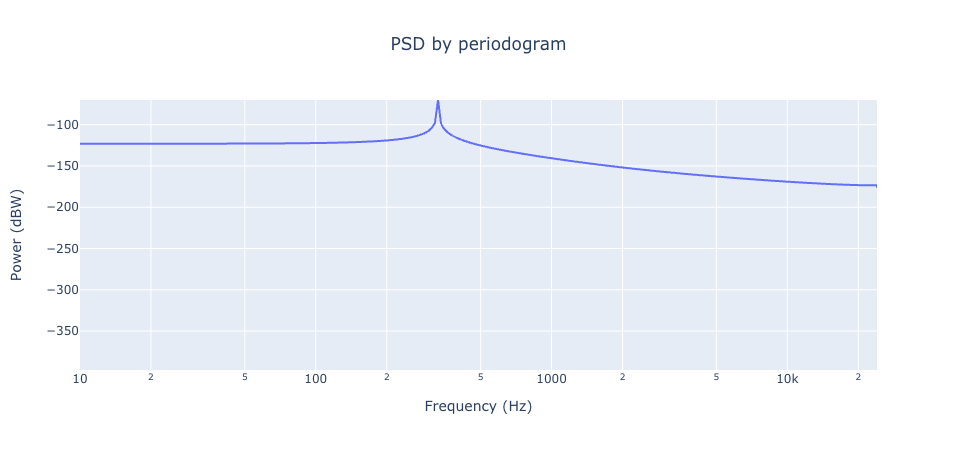

In [11]:
nh.plot_freq(y, fs=48e3)